## **SCORING - Vitamin E: Workflow6**
#### **Micha Birklbauer 2021-08-01**

In [1]:
import os
from shutil import copyfile
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrogen_Bond:VAL389B,Hydrophobic_Interaction:HIS390B,Salt_Bridge:LYS140B,Hydrogen_Bond:PRO98B,Hydrophobic_Interaction:HIS130B,Halogen_Bond:ARG138B,Hydrophobic_Interaction:ARG165B,Hydrogen_Bond:ALA388B,...,Salt_Bridge:HIS624B,Salt_Bridge:GLU134B,Salt_Bridge:ASP166B,Hydrophobic_Interaction:GLN141B,Hydrogen_Bond:GLU70B,Hydrogen_Bond:ARG101B,Hydrophobic_Interaction:ALA388B,Hydrophobic_Interaction:VAL107B,Hydrophobic_Interaction:GLU108B,LABEL
0,1,101|VitaminE_allmin_active|sdf|101,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,active
1,2,111|VitaminE_allmin_decoy|sdf|111,0,0,0,0,1,0,0,0,...,0,0,0,1,0,2,0,0,0,inactive
2,3,19|VitaminE_allmin_active|sdf|19,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,active
3,4,54|VitaminE_allmin_decoy|sdf|54,0,0,0,0,0,0,0,0,...,0,2,2,0,0,3,0,1,0,inactive
4,5,98|VitaminE_allmin_decoy|sdf|98,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,171|VitaminE_allmin_active|sdf|171,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,active
85,86,103|VitaminE_allmin_active|sdf|103,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,active
86,87,118|VitaminE_allmin_active|sdf|118,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,1,0,active
87,88,106|VitaminE_allmin_decoy|sdf|106,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,inactive


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(89, 91) 62


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(23, 91) 15


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(29, 91) 20


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:ARG138B,0.368578,0.112903,0.481481
1,2,Hydrophobic_Interaction:LYS133B,0.195938,0.677419,0.481481
2,3,Hydrophobic_Interaction:PRO164B,0.158303,0.306452,0.148148
3,4,Hydrogen_Bond:ASP166B,0.155317,0.451613,0.296296
4,5,Hydrophobic_Interaction:VAL107B,0.149343,0.741935,0.592593
...,...,...,...,...,...
83,84,Hydrogen_Bond:ASP113B,0.004779,0.032258,0.037037
84,85,Hydrophobic_Interaction:PHE393B,0.004779,0.032258,0.037037
85,86,Salt_Bridge:LYS394B,0.004779,0.032258,0.037037
86,87,Hydrogen_Bond:ARG101B,0.004779,1.032258,1.037037


#### **Extract relevant features:**

In [10]:
features_filtered = get_relevant_features(features)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:ARG138B,0.368578,0.112903,0.481481
1,2,Hydrophobic_Interaction:LYS133B,0.195938,0.677419,0.481481
2,3,Hydrophobic_Interaction:PRO164B,0.158303,0.306452,0.148148
3,4,Hydrogen_Bond:ASP166B,0.155317,0.451613,0.296296
4,5,Hydrophobic_Interaction:VAL107B,0.149343,0.741935,0.592593
5,6,Pi-Cation_Interaction:ARG101B,0.139785,0.193548,0.333333
6,7,Hydrophobic_Interaction:ARG112B,0.118877,0.177419,0.296296
9,10,Hydrophobic_Interaction:LEU111B,0.105137,0.290323,0.185185
10,11,Hydrophobic_Interaction:LEU66B,0.097372,0.467742,0.370370
12,13,Hydrophobic_Interaction:GLN129B,0.086022,0.419355,0.333333


In [11]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [12]:
positives, negatives = get_feature_impact(features_filtered)

In [13]:
positives

['Hydrophobic_Interaction:LYS133B',
 'Hydrophobic_Interaction:PRO164B',
 'Hydrogen_Bond:ASP166B',
 'Hydrophobic_Interaction:VAL107B',
 'Hydrophobic_Interaction:LEU111B',
 'Hydrophobic_Interaction:LEU66B',
 'Hydrophobic_Interaction:GLN129B',
 'Hydrophobic_Interaction:VAL109B',
 'Hydrogen_Bond:LYS394B',
 'Hydrophobic_Interaction:VAL110B',
 'Hydrophobic_Interaction:GLU134B',
 'Hydrogen_Bond:GLU108B']

In [14]:
negatives

['Hydrogen_Bond:ARG138B',
 'Pi-Cation_Interaction:ARG101B',
 'Hydrophobic_Interaction:ARG112B',
 'Hydrophobic_Interaction:GLU108B',
 'Hydrogen_Bond:THR137B',
 'Hydrophobic_Interaction:ARG138B']

#### **Score Compounds with different strategies & save results:**

In [15]:
# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
# train_result_strat1_sorted.to_csv("train_scores1.csv")
# train_result_strat2_sorted.to_csv("train_scores2.csv")
# train_result_strat3_sorted.to_csv("train_scores3.csv")
# train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [16]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [4, 0.6966292134831461] 
Strategy 2:  [4, 0.7078651685393258] 
Strategy 3:  [2, 0.7303370786516854] 
Strategy 4:  [0, 0.7303370786516854]


*accuracy for best cutoff:*

In [17]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 4, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 4, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 2, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 0, "accuracy")
)

Strategy 1:  0.6966292134831461 
Strategy 2:  0.7078651685393258 
Strategy 3:  0.7303370786516854 
Strategy 4:  0.7303370786516854


*false positive rate for best cutoff:*

In [18]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 4, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 4, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 2, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 0, "fpr")
)

Strategy 1:  0.7777777777777778 
Strategy 2:  0.7777777777777778 
Strategy 3:  0.7407407407407407 
Strategy 4:  0.8518518518518519


#### **Calculate validation and test results:**

In [19]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [20]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [21]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 4, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 2, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, 0, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6966292134831461, 'FPR': 0.7777777777777778, 'AUC': 0.7037037037037037, 'Ya': 0.7272727272727273, 'EF': 1.0439882697947214, 'REF': 90.3225806451613} 
Strategy 2:  {'ACC': 0.7078651685393258, 'FPR': 0.7777777777777778, 'AUC': 0.7249103942652331, 'Ya': 0.7307692307692307, 'EF': 1.0490074441687345, 'REF': 91.93548387096774} 
Strategy 3:  {'ACC': 0.7303370786516854, 'FPR': 0.7407407407407407, 'AUC': 0.7258064516129032, 'Ya': 0.7435897435897436, 'EF': 1.0674110835401158, 'REF': 93.54838709677419} 
Strategy 4:  {'ACC': 0.7303370786516854, 'FPR': 0.8518518518518519, 'AUC': 0.7329749103942651, 'Ya': 0.7261904761904762, 'EF': 1.0424347158218126, 'REF': 98.38709677419355}


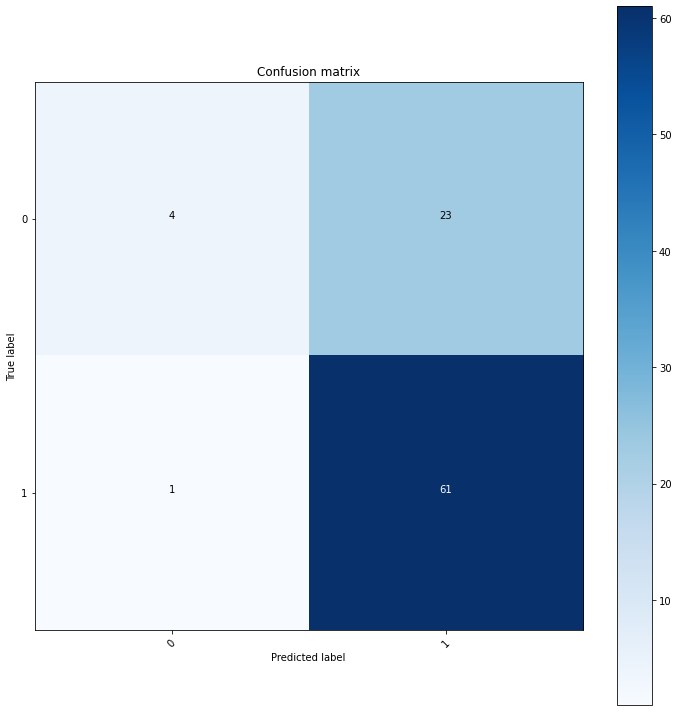

In [22]:
plot_confusion_matrix(get_metrics(train_result_strat4, 0)["CM"], classes = [0, 1], filename = "results/CM_train_strat4.png");

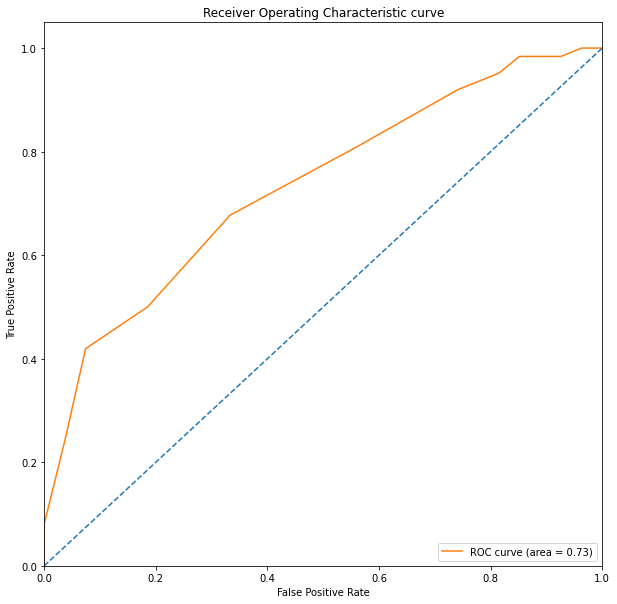

In [23]:
roc = get_metrics(train_result_strat4, 0)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat4.png");

*validation data:*

In [24]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 4, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 2, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, 0, pretty_print = True)
)

Strategy 1:  {'ACC': 0.7391304347826086, 'FPR': 0.625, 'AUC': 0.7791666666666667, 'Ya': 0.7368421052631579, 'EF': 1.1298245614035087, 'REF': 93.33333333333333} 
Strategy 2:  {'ACC': 0.7391304347826086, 'FPR': 0.625, 'AUC': 0.7583333333333333, 'Ya': 0.7368421052631579, 'EF': 1.1298245614035087, 'REF': 93.33333333333333} 
Strategy 3:  {'ACC': 0.7391304347826086, 'FPR': 0.375, 'AUC': 0.8458333333333334, 'Ya': 0.8, 'EF': 1.2266666666666668, 'REF': 80.0} 
Strategy 4:  {'ACC': 0.7391304347826086, 'FPR': 0.75, 'AUC': 0.8208333333333333, 'Ya': 0.7142857142857143, 'EF': 1.0952380952380953, 'REF': 100.0}


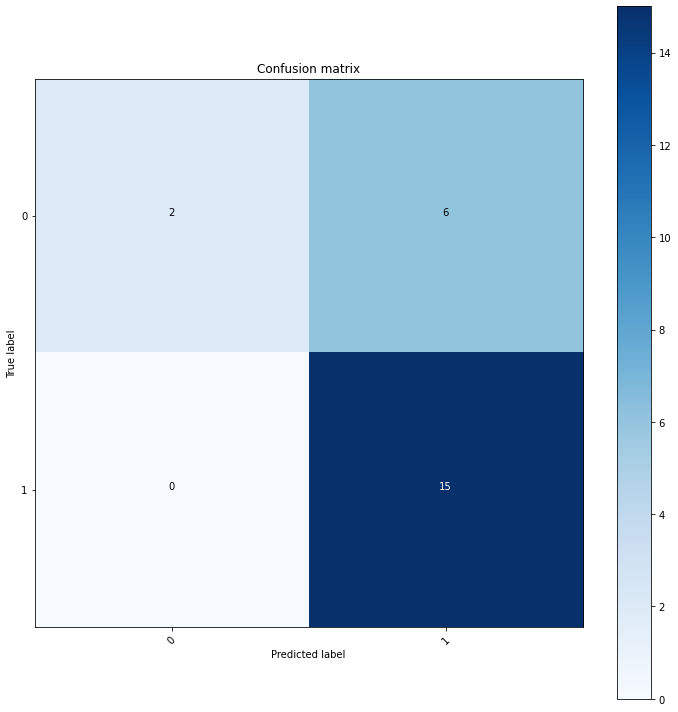

In [25]:
plot_confusion_matrix(get_metrics(val_result_strat4, 0)["CM"], classes = [0, 1], filename = "results/CM_val_strat4.png");

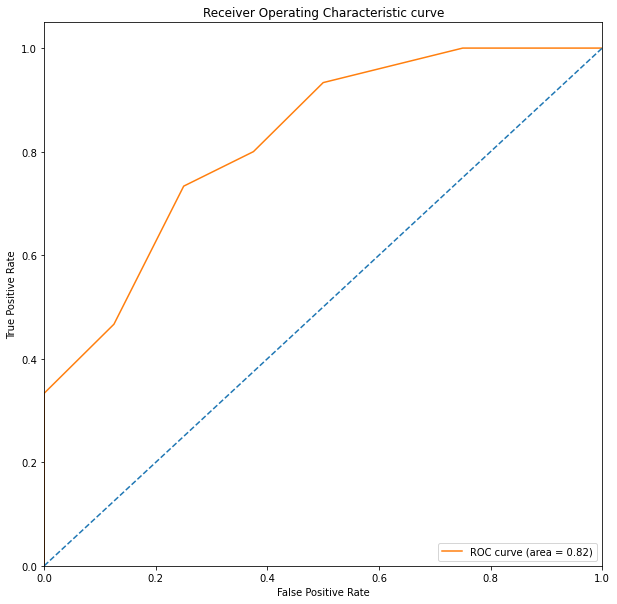

In [26]:
roc = get_metrics(val_result_strat4, 0)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat4.png");

*test data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 4, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, 2, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, 0, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6206896551724138, 'FPR': 0.8888888888888888, 'AUC': 0.4888888888888889, 'Ya': 0.68, 'EF': 0.986, 'REF': 85.0} 
Strategy 2:  {'ACC': 0.6206896551724138, 'FPR': 0.8888888888888888, 'AUC': 0.5111111111111111, 'Ya': 0.68, 'EF': 0.986, 'REF': 85.0} 
Strategy 3:  {'ACC': 0.5862068965517241, 'FPR': 0.7777777777777778, 'AUC': 0.5444444444444445, 'Ya': 0.6818181818181818, 'EF': 0.9886363636363635, 'REF': 75.0} 
Strategy 4:  {'ACC': 0.6896551724137931, 'FPR': 0.8888888888888888, 'AUC': 0.5694444444444444, 'Ya': 0.7037037037037037, 'EF': 1.0203703703703704, 'REF': 95.0}


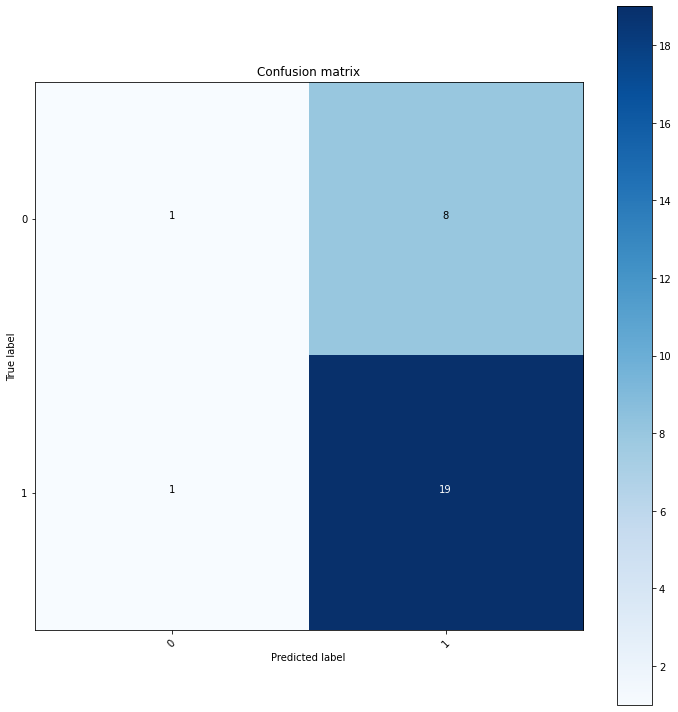

In [28]:
plot_confusion_matrix(get_metrics(test_result_strat4, 0)["CM"], classes = [0, 1], filename = "results/CM_test_strat4.png");

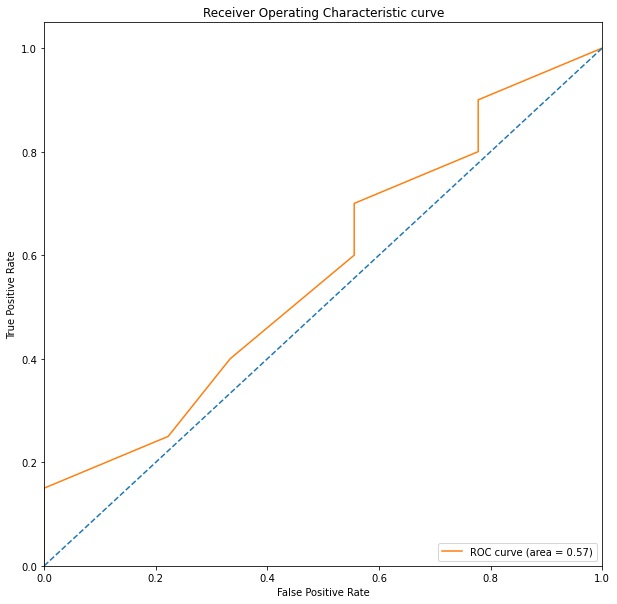

In [29]:
roc = get_metrics(test_result_strat4, 0)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat4.png");

#### **Clean up:**

In [30]:
os.remove("scoring.py")